# 4.10 Exercise

## Contents 
1. Importing libraries & dataframe
2. Drop columns due to security implications 
3. Create a regional segmentation
4. Create an exclusion flag for low-activity customers
5. Customer profiles 
6. Create visualizations for distribution of profiles¶
7. Aggregate 
8. Compare your customer profiles with regions and departments.¶ 
9. Export final data set

# 1. Importing libraries & dataframe

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Folder path
path = '/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 4/06-23-Instacart Basket Analysis /'
path

'/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 4/06-23-Instacart Basket Analysis /'

In [4]:
#Importing final instacart dataset
ic_df = pd.read_pickle(os.path.join (path, '02 Data', 'Prepared Data', 'customer_ords_prods_merged.pkl' ))
ic_df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,order_frequency_flag,First Name,Last Name,Gender,State,Age,Date_joined,Number_of_dependants,Marital_status,Income
0,2539329,1,1,2,8,NaN,196,1,0,195,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,195,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,195,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 2. Drop columns due to security implications

In [5]:
# Dropping First Name and Last Name columns
ic_df = ic_df.drop(columns=['First Name', 'Last Name'])

In [6]:
ic_df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,spending_flag,median_last_orders,order_frequency_flag,Gender,State,Age,Date_joined,Number_of_dependants,Marital_status,Income
0,2539329,1,1,2,8,NaN,196,1,0,195,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,195,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,195,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# 3. Create a regional segmentation

In [7]:
# Dividing states into regions 
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South= ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West= ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# Creating region flag
ic_df.loc[ic_df['State'].isin(Northeast), 'Region'] = 'Northeast'
ic_df.loc[ic_df['State'].isin(Midwest), 'Region'] = 'Midwest'
ic_df.loc[ic_df['State'].isin(South), 'Region'] = 'South'
ic_df.loc[ic_df['State'].isin(West), 'Region'] = 'West'

In [10]:
ic_df['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

### Compare spending habits between regions

In [14]:
#Comparing spending habits between regions by creating a crosstab
crosstab = pd.crosstab(ic_df['Region'], ic_df['spending_flag'], dropna = False)
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,156154,7441171
Northeast,108245,5614491
South,210017,10581868
West,160478,8132435


In [75]:
# grouping region and user spending
region_spending_counts = ic_df.groupby(['Region','spending_flag']).size().unstack(fill_value=0)

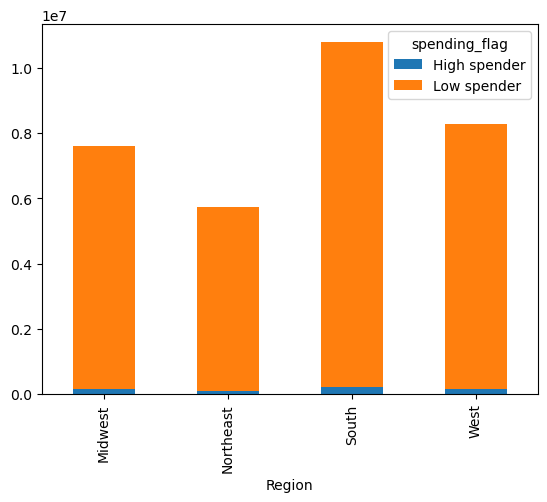

In [76]:
# Creating bar chart for region and spending 
bar_region_spending = region_spending_counts.plot.bar(stacked=True)

In [77]:
# exporting region spending chart
bar_region_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_spending.png'))

#### Observation: There doesn't seem to be a spending difference between regions because if you look at every region there are more 'low spenders' than 'high spenders'.

# 4. Create an exclusion flag for low-activity customers

In [16]:
# Creating an exclusion flag for customers who don't generate much revenue
ic_df.loc[ic_df['order_number'] < 5, 'exclusion_flag'] = 'YES'
ic_df.loc[ic_df['order_number'] >= 5, 'exclusion_flag'] = 'NO'

In [17]:
ic_df['exclusion_flag'].value_counts(dropna = False)

NO     24414877
YES     7989982
Name: exclusion_flag, dtype: int64

In [18]:
ic_df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,order_frequency_flag,Gender,State,Age,Date_joined,Number_of_dependants,Marital_status,Income,Region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,195,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,YES
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,YES
2,473747,1,3,3,12,21.0,196,1,1,195,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,YES
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,YES
4,431534,1,5,4,15,28.0,196,1,1,195,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NO


In [19]:
# Creating a new dataset with exclusion flag
df_ex_fl = ic_df.loc[ic_df['exclusion_flag'] == 'NO']

In [20]:
df_ex_fl.shape

(24414877, 33)

In [21]:
ic_df.shape

(32404859, 33)

In [22]:
# Exporting exclusion flag dataset as pickle
df_ex_fl.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_ex_fl.pkl'))

# 5. Customer profiles

### Age Group Profile

In [23]:
# Age profiling
ic_df['Age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [24]:
# Creating age_group classification flags
ic_df.loc[(ic_df['Age'] < 35), 'age_group'] = 'Young Adult'
ic_df.loc[(ic_df['Age'] >= 35) & (ic_df['Age'] < 65), 'age_group'] = 'Middle-Aged'
ic_df.loc[(ic_df['Age'] >= 65), 'age_group'] = 'Senior'

In [25]:
ic_df['age_group'].value_counts(dropna = False)

Middle-Aged    15202120
Young Adult     8627655
Senior          8575084
Name: age_group, dtype: int64

### Income Profile

In [27]:
# income profiling
ic_df['Income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: Income, dtype: float64

In [30]:
# Creating income classification
ic_df.loc[(ic_df['Income'] <= 68000), 'income_group'] = 'Low Income'
ic_df.loc[(ic_df['Income'] > 68000) & (ic_df['Income'] <= 128000), 'income_group'] = 'Middle Income'
ic_df.loc[(ic_df['Income'] > 128000), 'income_group'] = 'High Income'

In [31]:
ic_df['income_group'].value_counts(dropna = False)

Middle Income    15929926
Low Income        8392729
High Income       8082204
Name: income_group, dtype: int64

### Dependents Profile

In [32]:
ic_df['Number_of_dependants'].value_counts(dropna = False)

3    8135109
0    8097503
2    8091143
1    8081104
Name: Number_of_dependants, dtype: int64

In [37]:
# Creating a dependant / no dependant flag
ic_df.loc[ic_df['Number_of_dependants'] == 0, 'dependants'] = 'No Dependants'
ic_df.loc[ic_df['Number_of_dependants'] >= 1, 'dependants'] = 'Has Dependants'

In [38]:
ic_df['dependants'].value_counts()

Has Dependants    24307356
No Dependants      8097503
Name: dependants, dtype: int64

# 6. Create visualizations for distribution of profiles

### Age group bar chart

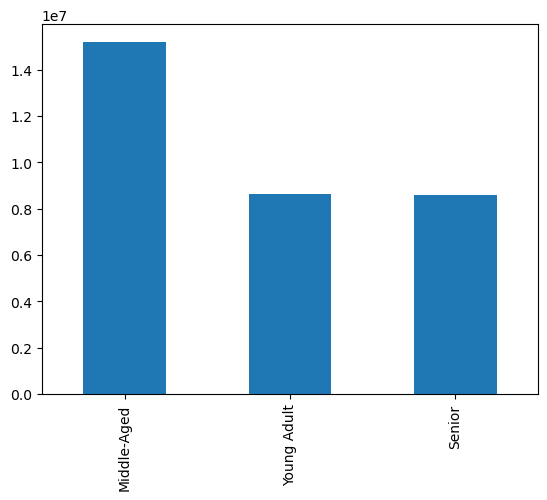

In [43]:
# Creating age bar chart
bar_age = ic_df['age_group'].value_counts().plot.bar()

In [41]:
# exporting bar chart
bar_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age.png'))

### Income bar chart

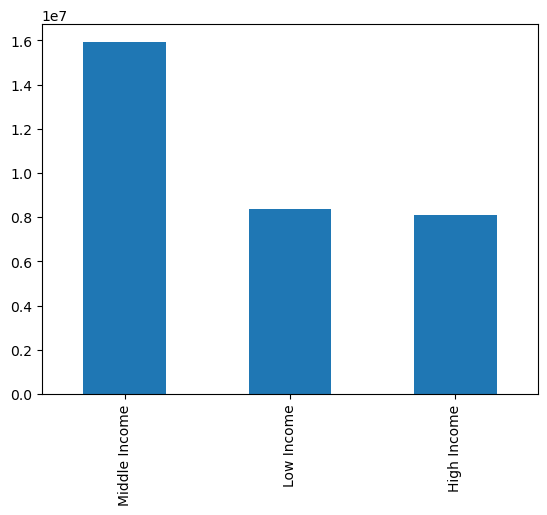

In [42]:
# Creating income bar chart
bar_income = ic_df['income_group'].value_counts().plot.bar()

In [44]:
# Exporting income bar chart
bar_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income.png'))

### Department Info charts

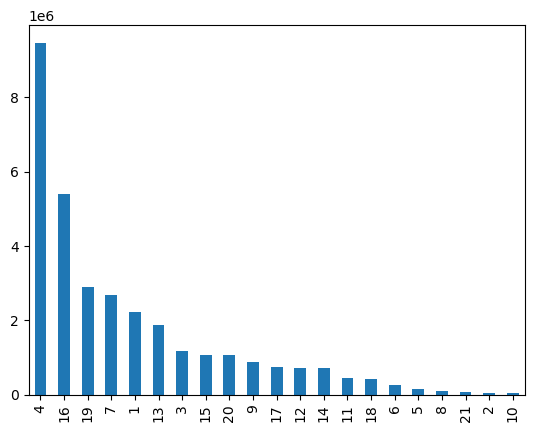

In [45]:
# department_id purchases
bar_dept = ic_df['department_id'].value_counts().plot.bar()

In [46]:
# The chart above doesn't really say much so I'll be giving names to id numbers
department_names = {1: 'Frozen', 2: 'Other', 3: 'Bakery', 4: 'Produce',5: 'Alcohol', 6: 'International',7: 'Beverages', 8:'Pets',9:'Dry Goods Pasta',10: 'Bulk', 11: 'Personal Care', 12: 'Meat/Seafood', 13: 'Pantry', 14: 'Breakfast',15:'Canned Goods', 16: 'Dairy/Eggs', 17: 'Household', 18: ' Babies', 19:'Snacks',20:'Deli',21:'Missing'}

In [47]:
# df for counts
department_counts = ic_df['department_id'].value_counts()

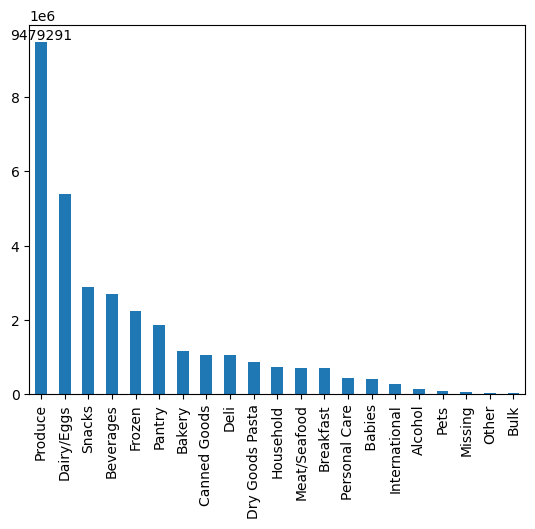

In [49]:
# Now everything on the chart is properly labled and easy to read
ax = department_counts.plot.bar()
ax.set_xticklabels([department_names.get(x, '') for x in department_counts.index])
for i, v in enumerate(department_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
    plt.show()

In [50]:
# exporting department bar chart
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept.png'))

### Grouping Department and Age

In [51]:
# grouping for age and department
age_department_counts = ic_df.groupby(['department_id','age_group']).size().unstack(fill_value=0)

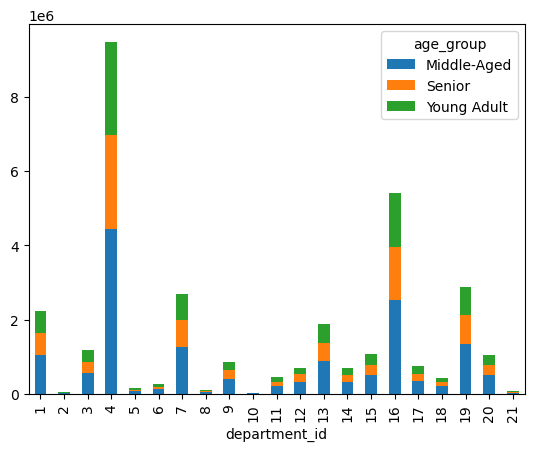

In [52]:
# bar chart for age and department id
bar_age_department = age_department_counts.plot.bar(stacked=True)

In [53]:
# exporting department & age chart
bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_department.png'))

### Grouping Department and Income

In [55]:
# grouping department and income
department_income_counts = ic_df.groupby(['department_id','income_group']).size().unstack(fill_value=0)

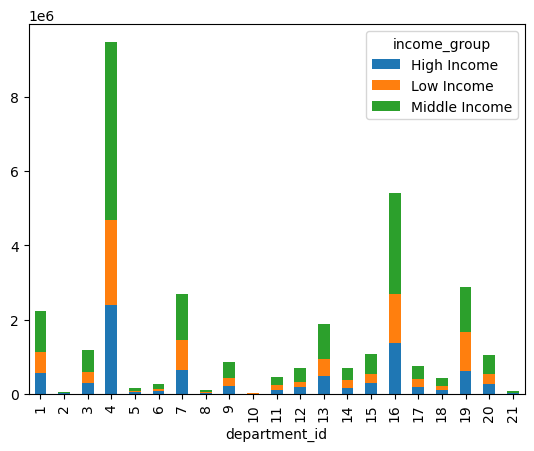

In [56]:
# Creating bar chart for department and income
bar_depart_income = department_income_counts.plot.bar(stacked=True)

In [57]:
# exporting department and income chart
bar_depart_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_depart_income.png'))

### Marital Info charts

### Grouping marital status and income

In [64]:
# grouping marital status and income
mar_income_counts = ic_df.groupby(['Marital_status','income_group']).size().unstack(fill_value=0)

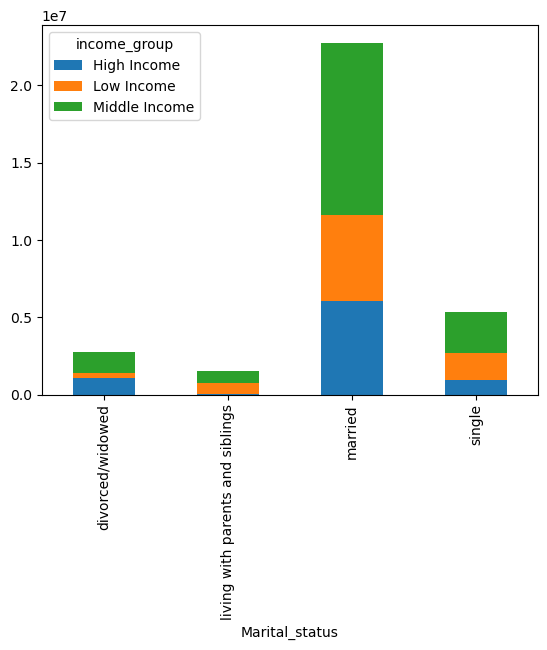

In [66]:
# Creating a bar chart for marital status and income
mar_income_counts = mar_income_counts.plot.bar(stacked=True )

In [67]:
# exporting marital/income chart
mar_income_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'mar_income.png'))

### Grouping marital status and age group

In [68]:
# Grouping marital and age
mar_age_counts = ic_df.groupby(['Marital_status','age_group']).size().unstack(fill_value=0)

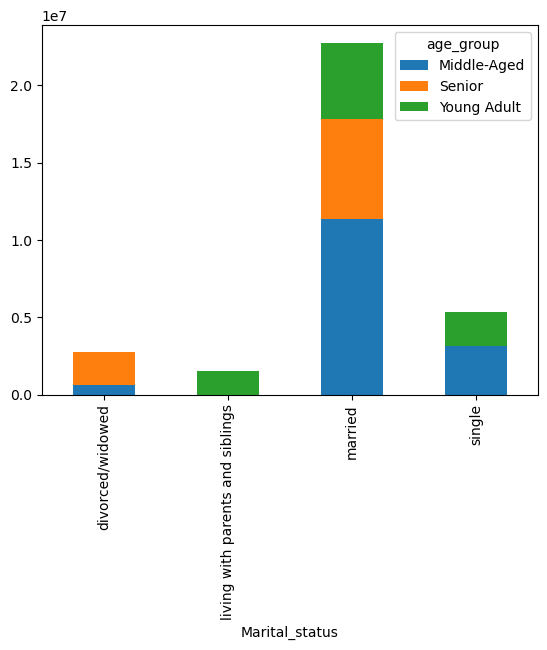

In [69]:
# Creating a bar chart for marital and age 
bar_mar_age = fam_age_counts.sort_index().plot.bar(stacked=True )

In [70]:
# exporting marital and age bar chart
bar_mar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_mar_age.png'))

### Grouping marital status and dependents

In [72]:
# grouping marital status and dependants
mar_depend_counts = ic_df.groupby(['Marital_status','dependants']).size().unstack(fill_value=0)

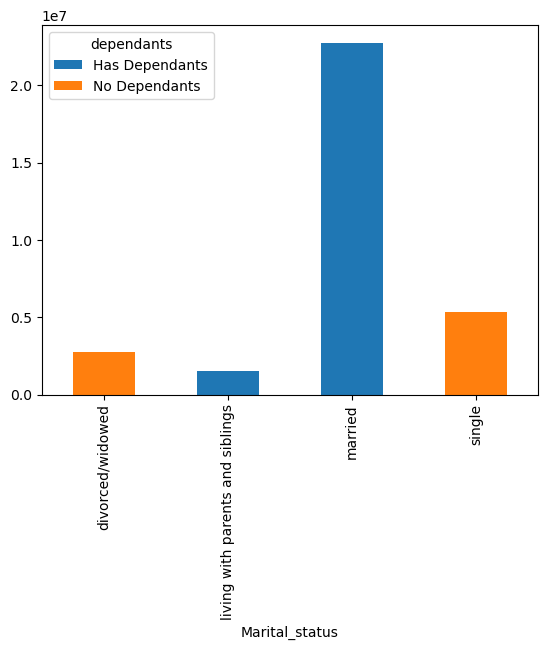

In [73]:
# Creating a bar chart for marital status and dependents
bar_mar_depend = mar_depend_counts.sort_index().plot.bar(stacked=True )

In [74]:
# exporting marital and dependent bar chart
bar_mar_depend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_mar_depend'))

### Loyalty info charts

### Grouping loyalty and frequency

In [83]:
# group by and loyalty and frequency
loyal_freq_counts = ic_df.groupby(['loyalty_flag','order_frequency_flag']).size().unstack(fill_value=0)

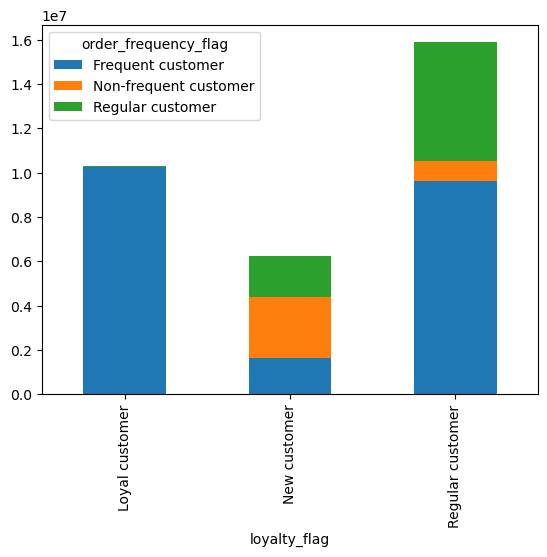

In [80]:
# Creating a bar chart for loyalty and frequency 
bar_loyal_freq = loyal_freq_counts.plot.bar(stacked=True)

In [82]:
# exporting loyalty and frequency
bar_loyal_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyal_freq.png'))

### Grouping loyalty and spending 

In [85]:
# grouping loyalty and spending
loyal_spend_counts = ic_df.groupby(['loyalty_flag','spending_flag']).size().unstack(fill_value=0)

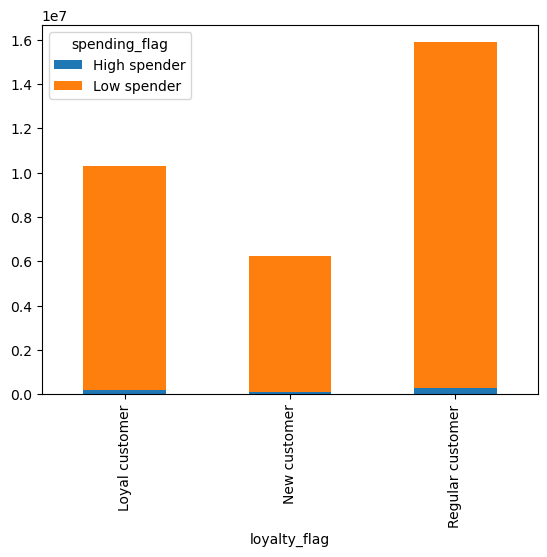

In [86]:
# Creating bar chart for loyalty and spending 
bar_loyal_spend = loyal_spend_counts.plot.bar(stacked=True)

In [87]:
# exporting loyalty/spending bar chart
bar_loyal_spend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyal_spend.png'))

### Grouping loyalty and region

In [89]:
# group loyalty and region
region_loyal_counts = ic_df.groupby(['Region','loyalty_flag']).size().unstack(fill_value=0)

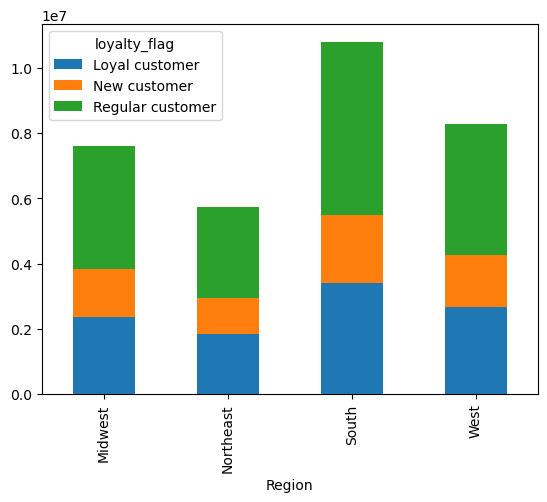

In [90]:
# Creating a bar chart for loyalty/region
bar_region_loyal = region_loyal_counts.plot.bar(stacked=True)

In [91]:
# exporting loyalty/region chart
bar_region_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_loyal.png'))

# 7. Aggregate

### Age and spending aggregations

In [92]:
ic_df.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Middle-Aged  11.989499  1.0  99999.0
Senior       11.768850  1.0  99999.0
Young Adult  12.173973  1.0  99999.0

###  Income and spending aggregations

In [93]:
ic_df.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
income_group                          
High Income    22.076865  1.0  99999.0
Low Income      7.315359  1.0  14900.0
Middle Income   9.315296  1.0  99999.0

### Dependants and spending aggregations


In [94]:
ic_df.groupby('dependants').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
dependants                             
Has Dependants  11.930584  1.0  99999.0
No Dependants   12.129243  1.0  99999.0

### Marital status and and spending aggregations

In [95]:
ic_df.groupby('Marital_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                                       mean  min      max
Marital_status                                           
divorced/widowed                  11.453674  1.0  99999.0
living with parents and siblings  10.828768  1.0  99999.0
married                           12.005659  1.0  99999.0
single                            12.480849  1.0  99999.0

### Frequency and age

In [97]:
ic_df.groupby('age_group').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                             mean  min   max
age_group                                   
Middle-Aged             11.108966  0.0  30.0
Senior                  11.078641  0.0  30.0
Young Adult             11.120753  0.0  30.0

### Frequency and income

In [98]:
ic_df.groupby('income_group').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                               mean  min   max
income_group                                  
High Income               11.024912  0.0  30.0
Low Income                11.308251  0.0  30.0
Middle Income             11.037247  0.0  30.0

### Frequency and dependants

In [99]:
ic_df.groupby('dependants').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                                mean  min   max
dependants                                     
Has Dependants             11.111834  0.0  30.0
No Dependants              11.080805  0.0  30.0

### Frequency and marital status

In [100]:
ic_df.groupby('Marital_status').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                                                  mean  min   max
Marital_status                                                   
divorced/widowed                             11.047780  0.0  30.0
living with parents and siblings             11.048170  0.0  30.0
married                                      11.116175  0.0  30.0
single                                       11.097992  0.0  30.0

# 8. Compare your customer profiles with regions and departments.

### Grouping region and ages

In [101]:
region_age_counts = ic_df.groupby(['Region','age_group']).size().unstack(fill_value=0)

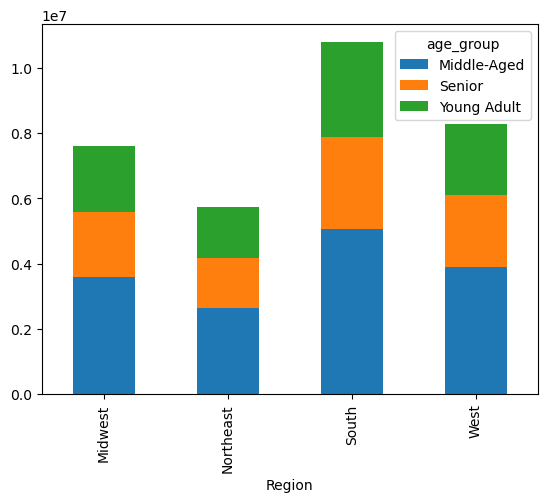

In [102]:
# Creating a bar chart for region and ages
region_age = region_age_counts.sort_index().plot.bar(stacked=True )

In [103]:
# exporting bar chart
region_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_age.png'))

### Grouping region and marital status

In [105]:
mar_region_counts = ic_df.groupby(['Region','Marital_status']).size().unstack(fill_value=0)

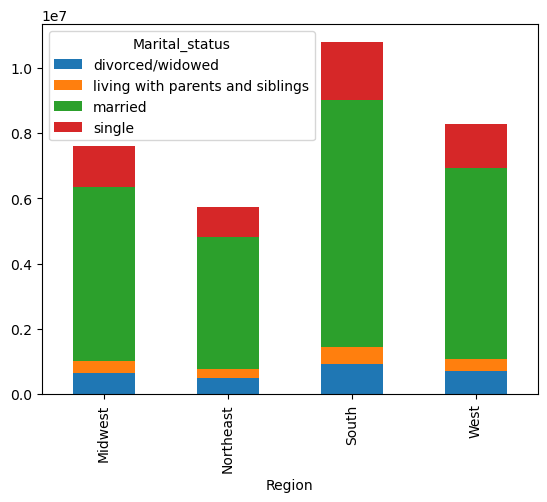

In [106]:
# Creating a bar chart for marital status and region
bar_mar_region = mar_region_counts.sort_index().plot.bar(stacked=True)

In [107]:
# exporting chart
bar_mar_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_mar_region.png'))

### Grouping region and income

In [108]:
region_income_counts = ic_df.groupby(['Region','income_group']).size().unstack(fill_value=0)

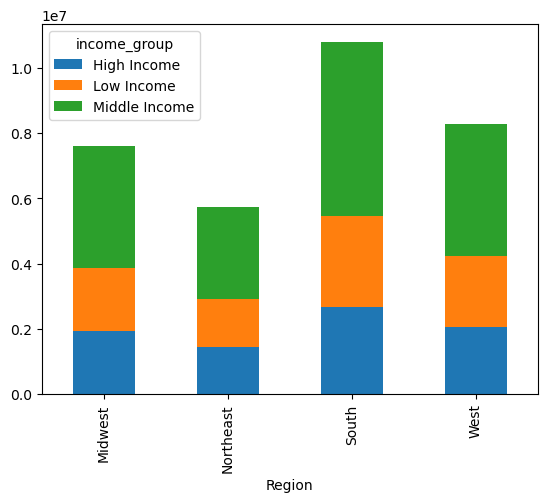

In [109]:
# Creating a bar chart for region and income
bar_region_income = region_income_counts.sort_index().plot.bar(stacked=True)

In [110]:
# exporting chart
bar_region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_income.png'))

### Grouping region and dependants

In [111]:
region_depend_counts = ic_df.groupby(['Region', 'dependants']).size().unstack(fill_value=0)

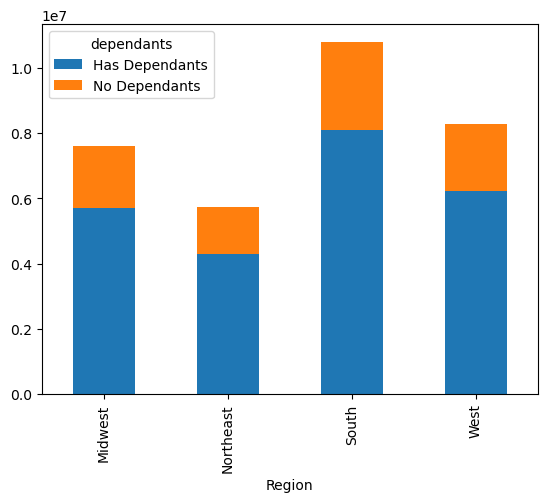

In [112]:
# Creating a bar chart for region and dependants
bar_region_depend = region_depend_counts.sort_index().plot.bar(stacked=True)

In [113]:
# exporting chart
bar_region_depend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_depend.png'))

# 9. Export final data set

In [116]:
# exporting final data
ic_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ic_data_final.pkl'))